# Thai Road Accident Year 2019 to 2022

## Consists of 2 table

### File names

1.accident record ("thai_road_acc.csv")


2.environment record ("env_condition")

## Getting Data

### Import data


In [2]:
#Import module 
import pandas as pd
import datetime as dt
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

#Checking Current working Directory location
os.getcwd()

'C:\\Users\\ADMIN'

### Load thai_road_acc save as 'road_accident'

In [3]:
# .csv file

#Table1
road_accident=pd.read_csv("thai_road_acc.csv")


## Data Profiling ดูข้อมูลเบื้องต้น

In [6]:
 # load file into table

rd_acc_data = pd.DataFrame(road_accident)
#see general view of dataset
rd_acc_data.head(20)

Acc_id Incident_datetime                  Province  \
0        1       1/1/19 0:00                    Loburi   
1        2       1/1/19 0:03          Ubon_Ratchathani   
2        3       1/1/19 0:05       Prachuap_Khiri_Khan   
3        4       1/1/19 0:20                Chiang_Mai   
4        5       1/1/19 0:25              Nakhon_Sawan   
5        6       1/1/19 0:30              Mae_Hong_Son   
6        7       1/1/19 0:30                  Chumphon   
7        8       1/1/19 0:35                 Sing_Buri   
8        9       1/1/19 0:40                  Songkhla   
9       10       1/1/19 0:45                       Tat   
10      11       1/1/19 0:45                   Lamphun   
11      12       1/1/19 0:45                  Chumphon   
12      13       1/1/19 1:00                    Phuket   
13      14       1/1/19 1:00                  Saraburi   
14      15       1/1/19 1:00                Ratchaburi   
15      16       1/1/19 1:04  Phra_Nakhon_Si_Ayutthaya   
16      17       1/1/19 1:15                  Saraburi   
17      18       1/1/19 1:20         Nakhon_Ratchasima   
18      19       1/1/19 1:20       Prachuap_Khiri_Khan   
19      20       1/1/19 1:30                  Saraburi   

                       Agency           Vehicle_type  \
0   Department_Of_Rural_Roads             motorcycle   
1      Department_Of_Highways  private/passenger_car   
2      department_of_highways             motorcycle   
3   Department_Of_Rural_Roads             motorcycle   
4      Department_Of_Highways  private/passenger_car   
5   Department_Of_Rural_Roads             motorcycle   
6      Department_Of_Highways   4-wheel_pickup_truck   
7      Department_Of_Highways             motorcycle   
8      DEPARTMENT_OF_HIGHWAYS             motorcycle   
9      Department_Of_Highways             motorcycle   
10     department_of_highways             motorcycle   
11     Department_Of_Highways             motorcycle   
12     Department_Of_Highways             motorcycle   
13     Department_Of_Highways             motorcycle   
14     Department_Of_Highways             motorcycle   
15     DEPARTMENT_OF_HIGHWAYS   4-wheel_pickup_truck   
16     Department_Of_Highways             motorcycle   
17     DEPARTMENT_OF_HIGHWAYS             motorcycle   
18     Department_Of_Highways             motorcycle   
19     Department_Of_Highways             motorcycle   

                                   Presumed_cause  \
0          driving_under_the_influence_of_alcohol   
1                                        speeding   
2                                        speeding   
3          driving_under_the_influence_of_alcohol   
4   cutting_in_closely_by_people/vehicles/animals   
5                                        speeding   
6                   failure_to_yield_right_of_way   
7                                        speeding   
8                                        speeding   
9                                        speeding   
10                                       speeding   
11                                       speeding   
12                                       speeding   
13                                       speeding   
14                        failure_to_yield/signal   
15                                       speeding   
16  cutting_in_closely_by_people/vehicles/animals   
17                                       speeding   
18                                       speeding   
19                                       speeding   

                                   Accident_type  Number_of_vehicles_involved  \
0                                          other                          1.0   
1               rollover/fallen_on_straight_road                          1.0   
2             head-on_collision_(not_overtaking)                          2.0   
3                                          other                          1.0   
4               rollover/fallen_on_straight_road                          1.0   
5       

In [61]:
# show information about this dataset
rd_acc_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81365 entries, 0 to 81364
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Acc_id                       81365 non-null  int64  
 1   Incident_datetime            81349 non-null  object 
 2   Province                     81349 non-null  object 
 3   Agency                       81349 non-null  object 
 4   Vehicle_type                 81349 non-null  object 
 5   Presumed_cause               81349 non-null  object 
 6   Accident_type                81349 non-null  object 
 7   Number_of_vehicles_involved  81349 non-null  float64
 8   Number_of_fatalities         81349 non-null  object 
 9   Number_of_injuries           81349 non-null  object 
 10  Latitude                     81349 non-null  float64
 11  Longitude                    81349 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 7.4+ MB


### Index of pandas that created is duplicate with Acc_id column.
 Set index column into Acc_id column and delete duplicate column.

In [4]:
rd_acc_data = rd_acc_data.set_index('Acc_id')
rd_acc_data.head(3)

Incident_datetime             Province                     Agency  \
Acc_id                                                                     
1            1/1/19 0:00               Loburi  Department_Of_Rural_Roads   
2            1/1/19 0:03     Ubon_Ratchathani     Department_Of_Highways   
3            1/1/19 0:05  Prachuap_Khiri_Khan     department_of_highways   

                 Vehicle_type                          Presumed_cause  \
Acc_id                                                                  
1                  motorcycle  driving_under_the_influence_of_alcohol   
2       private/passenger_car                                speeding   
3                  motorcycle                                speeding   

                             Accident_type  Number_of_vehicles_involved  \
Acc_id                                                                    
1                                    other                          1.0   
2         rollover/fallen_on_straight_road                          1.0   
3       head-on_collision_(not_overtaking)                          2.0   

       Number_of_fatalities Number_of_injuries   Latitude   Longitude  
Acc_id                                                                 
1                  0 person           2 person  14.959105  100.873463  
2                  0 person           2 person  15.210738  104.862689  
3                  1 person           0 person  12.374259   99.907949

## EDA(Exploratory data analysis) and Data cleansing

### Find missing value

In [5]:
#How many null in this data
rd_acc_data.isnull().sum()

Incident_datetime              16
Province                       16
Agency                         16
Vehicle_type                   16
Presumed_cause                 16
Accident_type                  16
Number_of_vehicles_involved    16
Number_of_fatalities           16
Number_of_injuries             16
Latitude                       16
Longitude                      16
dtype: int64

In [6]:
#Detail rows which are null
rd_acc_data[rd_acc_data.isnull().any(axis=1)]

Incident_datetime Province Agency Vehicle_type Presumed_cause  \
Acc_id                                                                 
81350                NaN      NaN    NaN          NaN            NaN   
81351                NaN      NaN    NaN          NaN            NaN   
81352                NaN      NaN    NaN          NaN            NaN   
81353                NaN      NaN    NaN          NaN            NaN   
81354                NaN      NaN    NaN          NaN            NaN   
81355                NaN      NaN    NaN          NaN            NaN   
81356                NaN      NaN    NaN          NaN            NaN   
81357                NaN      NaN    NaN          NaN            NaN   
81358                NaN      NaN    NaN          NaN            NaN   
81359                NaN      NaN    NaN          NaN            NaN   
81360                NaN      NaN    NaN          NaN            NaN   
81361                NaN      NaN    NaN          NaN            NaN   
81362                NaN      NaN    NaN          NaN            NaN   
81363                NaN      NaN    NaN          NaN            NaN   
81364                NaN      NaN    NaN          NaN            NaN   
81365                NaN      NaN    NaN          NaN            NaN   

       Accident_type  Number_of_vehicles_involved Number_of_fatalities  \
Acc_id                                                                   
81350            NaN                          NaN                  NaN   
81351            NaN                          NaN                  NaN   
81352            NaN                          NaN                  NaN   
81353            NaN                          NaN                  NaN   
81354            NaN                          NaN                  NaN   
81355            NaN                          NaN                  NaN   
81356            NaN                          NaN                  NaN   
81357            NaN                          NaN                  NaN   
81358            NaN                          NaN                  NaN   
81359            NaN                          NaN                  NaN   
81360            NaN                          NaN                  NaN   
81361            NaN                          NaN                  NaN   
81362            NaN                          NaN                  NaN   
81363            NaN                          NaN                  NaN   
81364            NaN                          NaN                  NaN   
81365            NaN                          NaN                  NaN   

       Number_of_injuries  Latitude  Longitude  
Acc_id                                          
81350                 NaN       NaN        NaN  
81351                 NaN       NaN        NaN  
81352                 NaN       NaN        NaN  
81353                 NaN       NaN        NaN  
81354                 NaN       NaN        NaN  
81355                 NaN       NaN        NaN  
81356                 NaN       NaN        NaN  
81357                 NaN       NaN        NaN  
81358                 NaN       NaN        NaN  
81359                 NaN       NaN        NaN  
81360                 NaN       NaN        NaN  
81361                 NaN       NaN        NaN  
81362                 NaN       NaN        NaN  
81363                 NaN       NaN        NaN  
81364                 NaN       NaN        NaN  
81365                 NaN       NaN        NaN

In [7]:
#Delete missing value
rd_acc_data = rd_acc_data.dropna()

#Recheck
rd_acc_data.isnull().sum()

Incident_datetime              0
Province                       0
Agency                         0
Vehicle_type                   0
Presumed_cause                 0
Accident_type                  0
Number_of_vehicles_involved    0
Number_of_fatalities           0
Number_of_injuries             0
Latitude                       0
Longitude                      0
dtype: int64

### Find anomalies

In [66]:
#check semantic anomalies(using for loop & iloc function)
for col in rd_acc_data.iloc[:,[1,2,4]]:
    print(rd_acc_data[col].unique())

['Loburi' 'Ubon_Ratchathani' 'Prachuap_Khiri_Khan' 'Chiang_Mai'
 'Nakhon_Sawan' 'Mae_Hong_Son' 'Chumphon' 'Sing_Buri' 'Songkhla' 'Tat'
 'Lamphun' 'Phuket' 'Saraburi' 'Ratchaburi' 'Phra_Nakhon_Si_Ayutthaya'
 'Nakhon_Ratchasima' 'Nakhon_Si_Thammarat' 'Kalasin' 'Chaiyaphum'
 'Suphan_Buri' 'Phetchaburi' 'Chai_Nat' 'Phrae' 'Prachin_Buri'
 'Nakhon_Pathom' 'Phetchabun' 'Ang_Thong' 'Kanchanaburi' 'Nonthaburi'
 'Samut_Prakan' 'Bangkok' 'Phayao' 'Phatthalung' 'Yala' 'Maha_Sarakham'
 'Surat_Thani' 'Amnat_Charoen' 'Nong_Khai' 'Trat' 'Nan' 'Phangnga'
 'Narathiwat' 'Chanthaburi' 'Samut_Sakhon' 'Samut_Songkhram' 'Phitsanulok'
 'Pathum_Thani' 'Tak' 'Loei' 'Chiang_Rai' 'Chachoengsao' 'Buri_Ram'
 'Uthai_Thani' 'Krabi' 'Surin' 'Udon_Thani' 'Si_Sa_Ket' 'Uttaradit'
 'Khon_Kaen' 'Kamphaeng_Phet' 'Yasothon' 'Satun' 'Nakhon_Nayok' 'Rayong'
 'Chon_Buri' 'buogkan' 'Sa_Kaeo' 'Nong_Bua_Lam_Phu' 'Roi_Et'
 'Sakon_Nakhon' 'Mukdahan' 'Nakhon_Phanom' 'Phichit' 'Pattani' 'Sukhothai'
 'Trang' 'Lampang' 'Ranong']
['Depar

In [8]:
rd_acc_data[rd_acc_data.Province == 'Tat']

Incident_datetime Province                  Agency Vehicle_type  \
Acc_id                                                                   
10           1/1/19 0:45      Tat  Department_Of_Highways   motorcycle   

       Presumed_cause       Accident_type  Number_of_vehicles_involved  \
Acc_id                                                                   
10           speeding  rear-end_collision                          2.0   

       Number_of_fatalities Number_of_injuries   Latitude   Longitude  
Acc_id                                                                 
10                 0 person           1 person  12.322957  102.552188

### Found misspellings of 'Tat'(must be Trat)

In [9]:
rd_acc_data['Province'] = rd_acc_data['Province'].str.replace("Tat","Trat")
rd_acc_data.loc[[10],['Province']]

Province
Acc_id         
10         Trat

### Find Values that are Thai language 

In [10]:

rd_acc_data[rd_acc_data['Presumed_cause'].str.contains('[ก-ฮ]+')==True]

Incident_datetime     Province                     Agency  \
Acc_id                                                             
22009      2/16/20 15:16  Phetchaburi  Department_Of_Rural_Roads   
22119       2/18/20 8:08      Sa_Kaeo  Department_Of_Rural_Roads   
80411     12/24/22 19:30   Udon_Thani     Department_Of_Highways   

                Vehicle_type            Presumed_cause  \
Acc_id                                                   
22009             motorcycle            ป้ายจราจรชำรุด   
22119             motorcycle  เส้นแบ่งทิศทางจราจรชำรุด   
80411   4-wheel_pickup_truck        มึนเมาจากแอลกอฮอล์   

                                       Accident_type  \
Acc_id                                                 
22009   collision_with_obstruction_(on_road_surface)   
22119   collision_with_obstruction_(on_road_surface)   
80411                           pedestrian_collision   

        Number_of_vehicles_involved Number_of_fatalities Number_of_injuries  \
Acc_id                                                                        
22009                           1.0             0 person           1 person   
22119                           1.0             1 person           0 person   
80411                           2.0             1 person           0 person   

         Latitude   Longitude  
Acc_id                         
22009   12.947334   99.979094  
22119   13.632132  102.273516  
80411   17.685825  103.203790

### Thai to Eng

In [11]:
rd_acc_data['Presumed_cause']= rd_acc_data['Presumed_cause'].str.replace('ป้ายจราจรชำรุด','disabled_vehicle_without_proper_signals/signs')
rd_acc_data['Presumed_cause']= rd_acc_data['Presumed_cause'].str.replace('เส้นแบ่งทิศทางจราจรชำรุด','disabled_vehicle_without_proper_signals/signs') 
rd_acc_data['Presumed_cause'] = rd_acc_data['Presumed_cause'].str.replace('มึนเมาจากแอลกอฮอล์','driving_under_the_influence_of_alcohol')

#Check
rd_acc_data.loc[[22009,22119,80411],'Presumed_cause']

Acc_id
22009    disabled_vehicle_without_proper_signals/signs
22119    disabled_vehicle_without_proper_signals/signs
80411           driving_under_the_influence_of_alcohol
Name: Presumed_cause, dtype: object

### Found data in Agency column are inappropriate format


In [12]:
rd_acc_data["Agency"].head()

Acc_id
1    Department_Of_Rural_Roads
2       Department_Of_Highways
3       department_of_highways
4    Department_Of_Rural_Roads
5       Department_Of_Highways
Name: Agency, dtype: object

In [13]:
# Make them to lowercase letter(using apply function)
rd_acc_data['Agency'] = rd_acc_data['Agency'].apply(lambda x: x.lower())
rd_acc_data["Agency"].head(20)

Acc_id
1     department_of_rural_roads
2        department_of_highways
3        department_of_highways
4     department_of_rural_roads
5        department_of_highways
6     department_of_rural_roads
7        department_of_highways
8        department_of_highways
9        department_of_highways
10       department_of_highways
11       department_of_highways
12       department_of_highways
13       department_of_highways
14       department_of_highways
15       department_of_highways
16       department_of_highways
17       department_of_highways
18       department_of_highways
19       department_of_highways
20       department_of_highways
Name: Agency, dtype: object

### Check datatype 

In [73]:
rd_acc_data.dtypes

Incident_datetime               object
Province                        object
Agency                          object
Vehicle_type                    object
Presumed_cause                  object
Accident_type                   object
Number_of_vehicles_involved    float64
Number_of_fatalities            object
Number_of_injuries              object
Latitude                       float64
Longitude                      float64
dtype: object

### Incident datetime  to datetime type

In [14]:
#change datatype string to datetime
rd_acc_data['Incident_datetime']= pd.to_datetime(rd_acc_data['Incident_datetime']).copy()

In [15]:
#Checking columns
rd_acc_data.iloc[:,[6,7,8]]

Number_of_vehicles_involved Number_of_fatalities Number_of_injuries
Acc_id                                                                     
1                               1.0             0 person           2 person
2                               1.0             0 person           2 person
3                               2.0             1 person           0 person
4                               1.0             0 person           1 person
5                               1.0             0 person           0 person
...                             ...                  ...                ...
81345                           1.0             1 person           0 person
81346                           1.0             1 person           0 person
81347                           1.0             0 person           3 person
81348                           1.0             1 person           0 person
81349                           2.0             3 person           0 person

[81349 rows x 3 columns]

### Invalid values

For manipulate the data 

In [16]:
#Delete 'person'
rd_acc_data["Number_of_injuries"] = rd_acc_data["Number_of_injuries"].str.replace("person", '')
rd_acc_data["Number_of_fatalities"] = rd_acc_data["Number_of_fatalities"].str.replace("person", '')

# Convert to int type
rd_acc_data ["Number_of_fatalities"] = rd_acc_data["Number_of_fatalities"].astype('int')
rd_acc_data ["Number_of_vehicles_involved"] = rd_acc_data["Number_of_vehicles_involved"].astype('int')
rd_acc_data ["Number_of_injuries"] = rd_acc_data["Number_of_injuries"].astype('int')

rd_acc_data.loc[:,['Number_of_injuries','Number_of_fatalities']]

Number_of_injuries  Number_of_fatalities
Acc_id                                          
1                        2                     0
2                        2                     0
3                        0                     1
4                        1                     0
5                        0                     0
...                    ...                   ...
81345                    0                     1
81346                    0                     1
81347                    3                     0
81348                    0                     1
81349                    0                     3

[81349 rows x 2 columns]

In [77]:
#check type of data
rd_acc_data.dtypes

Incident_datetime              datetime64[ns]
Province                               object
Agency                                 object
Vehicle_type                           object
Presumed_cause                         object
Accident_type                          object
Number_of_vehicles_involved             int32
Number_of_fatalities                    int32
Number_of_injuries                      int32
Latitude                              float64
Longitude                             float64
dtype: object

In [17]:
# stat view
rd_acc_data.describe()

Number_of_vehicles_involved  Number_of_fatalities  Number_of_injuries  \
count                 81349.000000          81349.000000        81349.000000   
mean                      1.534868              0.146099            0.813839   
std                       0.807141              0.434569            1.463185   
min                       0.000000              0.000000            0.000000   
25%                       1.000000              0.000000            0.000000   
50%                       1.000000              0.000000            0.000000   
75%                       2.000000              0.000000            1.000000   
max                      27.000000             13.000000           54.000000   

           Latitude     Longitude  
count  81349.000000  81349.000000  
mean      14.377446    100.810331  
std        3.062417      1.450628  
min        5.771304     97.847496  
25%       13.510374     99.885512  
50%       14.469131    100.555277  
75%       16.567485    101.292175  
max       20.438522    105.517239

In [19]:
rd_acc_data.to_csv("cleaned_acc_data.csv",index=False)

## Table 2 


### Import data and EDA


In [79]:
env_accident = pd.read_csv("env_condition.csv")

env_record = pd.DataFrame(env_accident)
env_record 

incident_datetime Weather_condition Road_description Slope_description  \
0           1/1/19 0:00             clear    straight_road          no_slope   
1           1/1/19 0:03             clear    straight_road          no_slope   
2           1/1/19 0:05             clear       wide_curve        slope_area   
3           1/1/19 0:20             clear    straight_road          no_slope   
4           1/1/19 0:25             clear    straight_road          no_slope   
...                 ...               ...              ...               ...   
81344    12/31/22 23:11             clear    straight_road          no_slope   
81345    12/31/22 23:30             clear            other             other   
81346    12/31/22 23:30             clear    straight_road          no_slope   
81347    12/31/22 23:45             clear    straight_road          no_slope   
81348    12/31/22 23:55             clear    straight_road          no_slope   

       Acc_code  acc_id  
0        571905       1  
1       3790870       2  
2        599075       3  
3        571924       4  
4        599523       5  
...         ...     ...  
81344   7534454   81345  
81345   7534701   81346  
81346   7567022   81347  
81347   7531271   81348  
81348   7556715   81349  

[81349 rows x 6 columns]

In [80]:
env_record .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81349 entries, 0 to 81348
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incident_datetime  81349 non-null  object
 1   Weather_condition  81349 non-null  object
 2   Road_description   81349 non-null  object
 3   Slope_description  81349 non-null  object
 4   Acc_code           81349 non-null  int64 
 5   acc_id             81349 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.7+ MB


### To datetime

In [81]:
# convert incident_datetime column to datetime

env_record["incident_datetime"] =pd.to_datetime(env_record["incident_datetime"])
env_record 

incident_datetime Weather_condition Road_description  \
0     2019-01-01 00:00:00             clear    straight_road   
1     2019-01-01 00:03:00             clear    straight_road   
2     2019-01-01 00:05:00             clear       wide_curve   
3     2019-01-01 00:20:00             clear    straight_road   
4     2019-01-01 00:25:00             clear    straight_road   
...                   ...               ...              ...   
81344 2022-12-31 23:11:00             clear    straight_road   
81345 2022-12-31 23:30:00             clear            other   
81346 2022-12-31 23:30:00             clear    straight_road   
81347 2022-12-31 23:45:00             clear    straight_road   
81348 2022-12-31 23:55:00             clear    straight_road   

      Slope_description  Acc_code  acc_id  
0              no_slope    571905       1  
1              no_slope   3790870       2  
2            slope_area    599075       3  
3              no_slope    571924       4  
4              no_slope    599523       5  
...                 ...       ...     ...  
81344          no_slope   7534454   81345  
81345             other   7534701   81346  
81346          no_slope   7567022   81347  
81347          no_slope   7531271   81348  
81348          no_slope   7556715   81349  

[81349 rows x 6 columns]

## Join Table

using merge function:

- table2# env_record : acc_id

- table1# rd_acc_data:Acc_id

In [82]:
#JOIN TABLE
accident_record = rd_acc_data.merge(env_record,how="left",left_on="Acc_id",right_on="acc_id")

accident_record

Incident_datetime             Province                     Agency  \
0     2019-01-01 00:00:00               Loburi  department_of_rural_roads   
1     2019-01-01 00:03:00     Ubon_Ratchathani     department_of_highways   
2     2019-01-01 00:05:00  Prachuap_Khiri_Khan     department_of_highways   
3     2019-01-01 00:20:00           Chiang_Mai  department_of_rural_roads   
4     2019-01-01 00:25:00         Nakhon_Sawan     department_of_highways   
...                   ...                  ...                        ...   
81344 2022-12-31 23:11:00           Nonthaburi     department_of_highways   
81345 2022-12-31 23:30:00                 Trat     department_of_highways   
81346 2022-12-31 23:30:00        Maha_Sarakham     department_of_highways   
81347 2022-12-31 23:45:00       Kamphaeng_Phet     department_of_highways   
81348 2022-12-31 23:55:00           Chiang_Rai     department_of_highways   

                Vehicle_type                                 Presumed_cause  \
0                 motorcycle         driving_under_the_influence_of_alcohol   
1      private/passenger_car                                       speeding   
2                 motorcycle                                       speeding   
3                 motorcycle         driving_under_the_influence_of_alcohol   
4      private/passenger_car  cutting_in_closely_by_people/vehicles/animals   
...                      ...                                            ...   
81344             motorcycle                                       speeding   
81345             motorcycle                                       speeding   
81346                    van                                       speeding   
81347             motorcycle         driving_under_the_influence_of_alcohol   
81348  private/passenger_car                                       speeding   

                            Accident_type  Number_of_vehicles_involved  \
0                                   other                            1   
1        rollover/fallen_on_straight_road                            1   
2      head-on_collision_(not_overtaking)                            2   
3                                   other                            1   
4        rollover/fallen_on_straight_road                            1   
...                                   ...                          ...   
81344    rollover/fallen_on_straight_road                            1   
81345    rollover/fallen_on_straight_road                            1   
81346    rollover/fallen_on_straight_road                            1   
81347    rollover/fallen_on_straight_road                            1   
81348                  rear-end_collision                            2   

       Number_of_fatalities  Number_of_injuries   Latitude   Longitude  \
0                         0                   2  14.959105  100.873463   
1                         0                   2  15.210738  104.862689   
2                         1                   0  12.374259   99.907949   
3                         0                   1  18.601721   98.804204   
4                         0                   0  15.866389  100.590010   
...                     ...                 ...        ...         ...   
81344                     1                   0  13.928736  100.529063   
81345                     1                   0  12.177881  102.415058   
81346                     0                   3  15.657933  103.253294   
81347                     1                   0  16.439598   99.423104   
81348                     3                   0  19.943224   99.846455   

        incident_datetime Weather_condition Road_description  \
0     2019-01-01 00:00:00             clear    straight_road   
1     2019-01-01 00:03:00             clear    straight_road   
2     2019-01-01 00:05:00             clear       wide_curve   
3     2019-01-01 00:20:00             clear    straight_road   
4     2019-01-01 00:25:00           

### Checking columns of accident_record table

In [83]:
for col_head in accident_record.columns.values:
    print(col_head)


Incident_datetime
Province
Agency
Vehicle_type
Presumed_cause
Accident_type
Number_of_vehicles_involved
Number_of_fatalities
Number_of_injuries
Latitude
Longitude
incident_datetime
Weather_condition
Road_description
Slope_description
Acc_code
acc_id


### Found incident_datetime duplicate and acc_id lowercase

In [84]:
# delete duplicate column from table 2

accident_record = accident_record.drop("incident_datetime",axis=1)

# Change acc_id to uppercase
accident_record.rename(columns={'acc_id':'Acc_id'},inplace=True)
accident_record.head()

Incident_datetime             Province                     Agency  \
0 2019-01-01 00:00:00               Loburi  department_of_rural_roads   
1 2019-01-01 00:03:00     Ubon_Ratchathani     department_of_highways   
2 2019-01-01 00:05:00  Prachuap_Khiri_Khan     department_of_highways   
3 2019-01-01 00:20:00           Chiang_Mai  department_of_rural_roads   
4 2019-01-01 00:25:00         Nakhon_Sawan     department_of_highways   

            Vehicle_type                                 Presumed_cause  \
0             motorcycle         driving_under_the_influence_of_alcohol   
1  private/passenger_car                                       speeding   
2             motorcycle                                       speeding   
3             motorcycle         driving_under_the_influence_of_alcohol   
4  private/passenger_car  cutting_in_closely_by_people/vehicles/animals   

                        Accident_type  Number_of_vehicles_involved  \
0                               other                            1   
1    rollover/fallen_on_straight_road                            1   
2  head-on_collision_(not_overtaking)                            2   
3                               other                            1   
4    rollover/fallen_on_straight_road                            1   

   Number_of_fatalities  Number_of_injuries   Latitude   Longitude  \
0                     0                   2  14.959105  100.873463   
1                     0                   2  15.210738  104.862689   
2                     1                   0  12.374259   99.907949   
3                     0                   1  18.601721   98.804204   
4                     0                   0  15.866389  100.590010   

  Weather_condition Road_description Slope_description  Acc_code  Acc_id  
0             clear    straight_road          no_slope    571905       1  
1             clear    straight_road          no_slope   3790870       2  
2             clear       wide_curve        slope_area    599075       3  
3             clear    straight_road          no_slope    571924       4  
4             clear    straight_road          no_slope    599523       5

In [85]:
accident_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81349 entries, 0 to 81348
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Incident_datetime            81349 non-null  datetime64[ns]
 1   Province                     81349 non-null  object        
 2   Agency                       81349 non-null  object        
 3   Vehicle_type                 81349 non-null  object        
 4   Presumed_cause               81349 non-null  object        
 5   Accident_type                81349 non-null  object        
 6   Number_of_vehicles_involved  81349 non-null  int32         
 7   Number_of_fatalities         81349 non-null  int32         
 8   Number_of_injuries           81349 non-null  int32         
 9   Latitude                     81349 non-null  float64       
 10  Longitude                    81349 non-null  float64       
 11  Weather_condition            81349 non-nu

### Checking duplicate value

In [86]:
accident_record.duplicated().sum()

0

## Graphical EDA

In [87]:
#interactive chart using plotly
#EDA

import plotly.express as px
fig = px.scatter(accident_record,'Incident_datetime','Number_of_fatalities')


fig

## Outliers

<AxesSubplot:xlabel='Number_of_fatalities'>

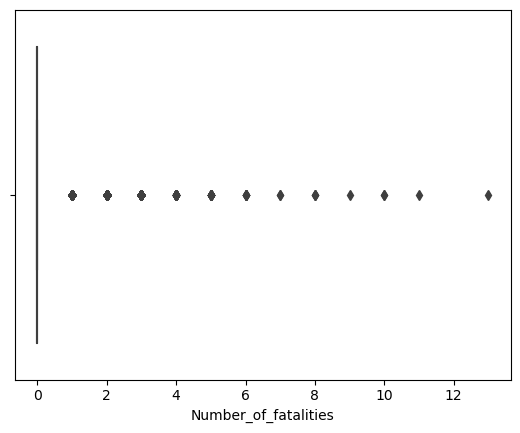

In [88]:
#Using Boxplot
sns.boxplot(x=accident_record['Number_of_fatalities'])

In [89]:
accident_record.query("Number_of_fatalities > 12")

Incident_datetime      Province                  Agency  \
13764 2019-09-29 00:30:00  Samut_Prakan  department_of_highways   

               Vehicle_type Presumed_cause   Accident_type  \
13764  4-wheel_pickup_truck       speeding  side_collision   

       Number_of_vehicles_involved  Number_of_fatalities  Number_of_injuries  \
13764                            1                    13                   4   

        Latitude   Longitude Weather_condition Road_description  \
13764  13.670044  100.720623             clear    straight_road   

      Slope_description  Acc_code  Acc_id  
13764          no_slope    613833   13765

## Ref Database

https://trams.mot.go.th/main-dashboard # dashboard
https://www.mots.go.th/news/category/411 # raw data

### According to website (fatalities 13 )

https://www.thairath.co.th/news/society/1676148

<AxesSubplot:xlabel='Number_of_injuries'>

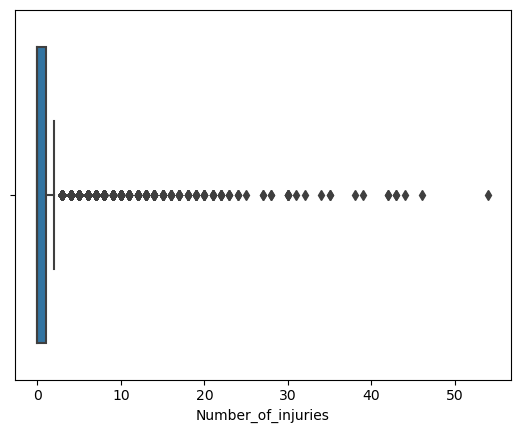

In [90]:
sns.boxplot(x=rd_acc_data['Number_of_injuries'])

In [91]:
accident_record.query("Number_of_injuries > 50")

Incident_datetime      Province                  Agency  \
679 2019-01-06 03:00:00  Pathum_Thani  department_of_highways   

                Vehicle_type Presumed_cause                     Accident_type  \
679  large_passenger_vehicle       speeding  rollover/fallen_on_straight_road   

     Number_of_vehicles_involved  Number_of_fatalities  Number_of_injuries  \
679                            1                     6                  54   

      Latitude   Longitude Weather_condition Road_description  \
679  14.016537  100.615454             rainy    straight_road   

    Slope_description  Acc_code  Acc_id  
679          no_slope   3792223     680

### Ref (injuries 54)

https://www.one31.net/news/detail/7241

### Save file

In [92]:
#index = False exclude index column
accident_record.to_csv("final_acc.csv",index = False)

## END